In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('raw_data/densityreports.csv')

In [3]:
df.head()

,ReportID,ProductReference,DateOfReport,SupplierName,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,PackagingQuality
0,RPT0000001,PRD07271,2024-03-04 00:00:00,SupplierA,Pants,Polyester,0.35,29.0,Method2,LayoutC,Good
1,RPT0000002,PRD00861,2024-05-27 00:00:00,SupplierC,T-Shirt,Denim,0.21,20.0,Method2,LayoutB,Good
2,RPT0000003,PRD05391,2023-11-18 00:00:00,SupplierA,Shirt,Cotton,0.20,31.0,Method1,LayoutA,Good
3,RPT0000004,PRD05192,2024-06-13 00:00:00,SupplierA,Coat,Cotton,1.30,5.0,Method1,LayoutD,Good
4,RPT0000005,PRD05735,2023-07-18 00:00:00,SupplierA,Coat,Polyester,1.11,9.0,Method2,LayoutD,Good


In [4]:
df.columns.tolist()

['ReportID',
 'ProductReference',
 'DateOfReport',
 'SupplierName',
 'GarmentType',
 'Material',
 'Weight',
 'ProposedUnitsPerCarton',
 'ProposedFoldingMethod',
 'ProposedLayout',
 'PackagingQuality']

In [5]:
categorical_columns = [
    'SupplierName',
    'GarmentType',
    'Material',
    'ProposedFoldingMethod',
    'ProposedLayout',
    'PackagingQuality'
]

for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: SupplierName
SupplierName
SupplierA    138607
SupplierB    110723
SupplierC     74490
SupplierD     53416
SupplierE     40662
SupplierF     32845
SupplierG     25510
SupplierH     13744
supplierA      1721
SupllierC      1714
supplierh      1674
SPLF           1642
SuplA          1629
SuppB          1623
Name: count, dtype: int64

Column: GarmentType
GarmentType
Shirt      101763
Pants       75554
Jacket      51450
T-Shirt     48321
Dress       40855
Skirt       40733
Suit        30042
Shorts      26320
Coat        24600
Sweater     23616
Blouse      23488
Hoodie      13258
Name: count, dtype: int64

Column: Material
Material
Cotton       197020
Polyester    125244
Linen         50282
Wool          49370
Silk          41883
Denim         36201
Name: count, dtype: int64

Column: ProposedFoldingMethod
ProposedFoldingMethod
Method2     218201
Method1     157652
Method3     114363
Methd1        2450
FoldX         2426
Method_2      2394
Name: count, dtype: int64

Column: ProposedL

In [6]:
import pandas as pd
import numpy as np

def clean_data(df):
    """
    Simple data cleaning using rightmost letter/digit extraction.
    """
    df_cleaned = df.copy()
    
    # Clean SupplierName: rightmost letter + "Supplier"
    df_cleaned['SupplierName'] = (
        'Supplier' + 
        df_cleaned['SupplierName'].astype(str).str.strip().str[-1:].str.upper()
    )
    
    # Clean ProposedFoldingMethod: drop unwanted, extract digit
    df_cleaned = df_cleaned[~df_cleaned['ProposedFoldingMethod'].str.lower().str.contains('foldx|box', na=False)]
    df_cleaned['ProposedFoldingMethod'] = (
        'Method' + 
        df_cleaned['ProposedFoldingMethod'].str.extract(r'(\d+)', expand=False)
    )
    
    # Clean ProposedLayout: drop unwanted, rightmost letter  
    df_cleaned = df_cleaned[~df_cleaned['ProposedLayout'].str.lower().str.contains('box|layoutx', na=False)]
    df_cleaned['ProposedLayout'] = (
        'Layout' + 
        df_cleaned['ProposedLayout'].astype(str).str.strip().str[-1:].str.upper()
    )
    
    # Clean PackagingQuality: drop uncertain, map to binary
    df_cleaned = df_cleaned[~df_cleaned['PackagingQuality'].str.lower().str.contains('uncertain', na=False)]
    quality_lower = df_cleaned['PackagingQuality'].str.lower().str.strip()
    df_cleaned['PackagingQuality'] = np.where(
        quality_lower.str.contains('g'), 1,
        np.where(quality_lower.str.contains('b'), 0, np.nan)
    )
    
    # Drop all rows with missing values and convert types
    df_cleaned = df_cleaned.dropna()
    df_cleaned['PackagingQuality'] = df_cleaned['PackagingQuality'].astype(int)
    
    return df_cleaned

In [7]:
df_cleaned = clean_data(df)

print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")
print(f"Rows dropped: {df.shape[0] - df_cleaned.shape[0]}")

print("\nCleaned value counts:")
for col in ['SupplierName', 'ProposedFoldingMethod', 'ProposedLayout', 'PackagingQuality']:
    print(f"\n{col}:")
    print(df_cleaned[col].value_counts())

Original shape: (500000, 11)
Cleaned shape: (488150, 11)
Rows dropped: 11850

Cleaned value counts:

SupplierName:
SupplierName
SupplierA    138565
SupplierB    109644
SupplierC     74368
SupplierD     52197
SupplierE     39722
SupplierF     33670
SupplierG     24916
SupplierH     15068
Name: count, dtype: int64

ProposedFoldingMethod:
ProposedFoldingMethod
Method2    217548
Method1    157811
Method3    112791
Name: count, dtype: int64

ProposedLayout:
ProposedLayout
LayoutB    177903
LayoutC    139910
LayoutA     85410
LayoutD     63799
LayoutE     21128
Name: count, dtype: int64

PackagingQuality:
PackagingQuality
1    391199
0     96951
Name: count, dtype: int64


In [8]:
df_cleaned.to_csv('cleaned_data.csv', index=False)

In [9]:
df_cleaned.head()

,ReportID,ProductReference,DateOfReport,SupplierName,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,PackagingQuality
0,RPT0000001,PRD07271,2024-03-04 00:00:00,SupplierA,Pants,Polyester,0.35,29.0,Method2,LayoutC,1
1,RPT0000002,PRD00861,2024-05-27 00:00:00,SupplierC,T-Shirt,Denim,0.21,20.0,Method2,LayoutB,1
2,RPT0000003,PRD05391,2023-11-18 00:00:00,SupplierA,Shirt,Cotton,0.20,31.0,Method1,LayoutA,1
3,RPT0000004,PRD05192,2024-06-13 00:00:00,SupplierA,Coat,Cotton,1.30,5.0,Method1,LayoutD,1
4,RPT0000005,PRD05735,2023-07-18 00:00:00,SupplierA,Coat,Polyester,1.11,9.0,Method2,LayoutD,1


## CLEANING THE OTHER CSV FILES

In [10]:
def analyze_categorical_columns(df, dataset_name):
    """
    Analyze all categorical columns in a dataset
    """
    print(f"\n{'='*50}")
    print(f"DATASET: {dataset_name}")
    print(f"Shape: {df.shape}")
    print(f"{'='*50}")
    
    # Identify categorical columns (object dtype or low cardinality)
    categorical_cols = []
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].nunique() < 50:
            categorical_cols.append(col)
    
    print(f"Categorical columns found: {categorical_cols}")
    
    # Show unique values for each categorical column
    for col in categorical_cols:
        unique_vals = df[col].value_counts()
        print(f"\n--- {col} ---")
        print(f"Unique count: {df[col].nunique()}")
        print(f"Missing values: {df[col].isnull().sum()}")
        print("Value counts:")
        
        # Show all values if reasonable number, otherwise top 10
        if len(unique_vals) <= 20:
            print(unique_vals)
        else:
            print("Top 15 values:")
            print(unique_vals.head(15))
            print(f"... and {len(unique_vals) - 15} more values")
    
    return categorical_cols

def compare_common_columns(datasets_dict):
    """
    Compare common columns across datasets
    """
    print(f"\n{'='*60}")
    print("CROSS-DATASET COMPARISON")
    print(f"{'='*60}")
    
    # Find common columns
    all_columns = {}
    for name, df in datasets_dict.items():
        all_columns[name] = set(df.columns)
    
    # Check for common categorical columns
    common_cols = ['SupplierName', 'GarmentType', 'Material', 'ProductReference']
    
    for col in common_cols:
        print(f"\n--- {col} COMPARISON ---")
        datasets_with_col = []
        
        for name, df in datasets_dict.items():
            if col in df.columns:
                datasets_with_col.append(name)
                unique_count = df[col].nunique()
                sample_values = df[col].value_counts().head(5).index.tolist()
                print(f"{name}: {unique_count} unique values")
                print(f"  Sample: {sample_values}")
        
        if len(datasets_with_col) > 1:
            print(f"  → Found in: {datasets_with_col}")
        else:
            print(f"  → Only in: {datasets_with_col}")

def check_missing_values(datasets_dict):
    """
    Check missing values across all datasets
    """
    print(f"\n{'='*60}")
    print("MISSING VALUES SUMMARY")
    print(f"{'='*60}")
    
    for name, df in datasets_dict.items():
        missing = df.isnull().sum()
        if missing.sum() > 0:
            print(f"\n{name}:")
            for col, count in missing[missing > 0].items():
                print(f"  {col}: {count:,} missing ({count/len(df)*100:.1f}%)")
        else:
            print(f"\n{name}: No missing values")

In [11]:
# Load your datasets
density = pd.read_csv('raw_data/densityreports.csv')  
product = pd.read_csv('raw_data/productattributes.csv')
supplier = pd.read_csv('raw_data/supplierscorecard.csv')
incidents = pd.read_csv('raw_data/historicalincidents.csv')

# Analyze each dataset
analyze_categorical_columns(density, "DensityReports")
analyze_categorical_columns(product, "ProductAttributes") 
analyze_categorical_columns(supplier, "SupplierScorecard")
analyze_categorical_columns(incidents, "HistoricalIncidents")

# Compare across datasets
datasets = {
    'DensityReports': density,
    'ProductAttributes': product,
    'SupplierScorecard': supplier,
    'HistoricalIncidents': incidents
}

compare_common_columns(datasets)
check_missing_values(datasets)


DATASET: DensityReports
Shape: (500000, 11)
Categorical columns found: ['ReportID', 'ProductReference', 'DateOfReport', 'SupplierName', 'GarmentType', 'Material', 'ProposedFoldingMethod', 'ProposedLayout', 'PackagingQuality']

--- ReportID ---
Unique count: 500000
Missing values: 0
Value counts:
Top 15 values:
ReportID
RPT0000001    1
RPT0333344    1
RPT0333342    1
RPT0333341    1
RPT0333340    1
RPT0333339    1
RPT0333338    1
RPT0333337    1
RPT0333336    1
RPT0333335    1
RPT0333334    1
RPT0333333    1
RPT0333332    1
RPT0333331    1
RPT0333330    1
Name: count, dtype: int64
... and 499985 more values

--- ProductReference ---
Unique count: 15429
Missing values: 0
Value counts:
Top 15 values:
ProductReference
PRD06       793
PRD00       791
PRD01       782
PRD05       777
PRD03       768
PRD02       759
PRD07       756
PRD09       746
PRD08       746
PRD04       734
PRD05691     77
PRD05352     75
PRD00369     75
PRD00703     75
PRD07935     75
Name: count, dtype: int64
... and 1

In [1]:
import pandas as pd
import numpy as np

def clean_density_reports(df):
    """
    Clean DensityReports dataset (your existing function)
    """
    df_cleaned = df.copy()
    
    # Clean SupplierName: rightmost letter + "Supplier"
    df_cleaned['SupplierName'] = (
        'Supplier' + 
        df_cleaned['SupplierName'].astype(str).str.strip().str[-1:].str.upper()
    )
    
    # Clean ProposedFoldingMethod: drop unwanted, extract digit
    df_cleaned = df_cleaned[~df_cleaned['ProposedFoldingMethod'].str.lower().str.contains('foldx|box', na=False)]
    df_cleaned['ProposedFoldingMethod'] = (
        'Method' + 
        df_cleaned['ProposedFoldingMethod'].str.extract(r'(\d+)', expand=False)
    )
    
    # Clean ProposedLayout: drop unwanted, rightmost letter  
    df_cleaned = df_cleaned[~df_cleaned['ProposedLayout'].str.lower().str.contains('box|layoutx', na=False)]
    df_cleaned['ProposedLayout'] = (
        'Layout' + 
        df_cleaned['ProposedLayout'].astype(str).str.strip().str[-1:].str.upper()
    )
    
    # Clean PackagingQuality: drop uncertain, map to binary
    df_cleaned = df_cleaned[~df_cleaned['PackagingQuality'].str.lower().str.contains('uncertain', na=False)]
    quality_lower = df_cleaned['PackagingQuality'].str.lower().str.strip()
    df_cleaned['PackagingQuality'] = np.where(
        quality_lower.str.contains('g'), 1,
        np.where(quality_lower.str.contains('b'), 0, np.nan)
    )
    
    # Standardize ProductReference for merging
    df_cleaned['ProductReference'] = df_cleaned['ProductReference'].astype(str).str.strip().str.upper()
    
    # Clean GarmentType and Material (likely already clean, but standardize)
    df_cleaned['GarmentType'] = df_cleaned['GarmentType'].str.strip().str.title()
    df_cleaned['Material'] = df_cleaned['Material'].str.strip().str.title()
    
    # Convert dates
    df_cleaned['DateOfReport'] = pd.to_datetime(df_cleaned['DateOfReport'])
    
    # Drop all rows with missing values
    df_cleaned = df_cleaned.dropna()
    df_cleaned['PackagingQuality'] = df_cleaned['PackagingQuality'].astype(int)
    
    return df_cleaned

def clean_product_attributes(df):
    """
    Clean ProductAttributes dataset to match DensityReports format
    """
    df_cleaned = df.copy()
    
    # Standardize ProductReference (CRITICAL for merging)
    df_cleaned['ProductReference'] = df_cleaned['ProductReference'].astype(str).str.strip().str.upper()
    
    # Standardize GarmentType and Material to match DensityReports
    df_cleaned['GarmentType'] = df_cleaned['GarmentType'].str.strip().str.title()
    df_cleaned['Material'] = df_cleaned['Material'].str.strip().str.title()
    
    # Clean Collection - standardize seasons
    if 'Collection' in df_cleaned.columns:
        df_cleaned['Collection'] = df_cleaned['Collection'].str.strip().str.title()
    
    # Clean Size - standardize format
    if 'Size' in df_cleaned.columns:
        df_cleaned['Size'] = df_cleaned['Size'].astype(str).str.strip().str.upper()
    
    # Clean ProductName
    if 'ProductName' in df_cleaned.columns:
        df_cleaned['ProductName'] = df_cleaned['ProductName'].str.strip()
    
    # Ensure Weight is numeric
    if 'Weight' in df_cleaned.columns:
        df_cleaned['Weight'] = pd.to_numeric(df_cleaned['Weight'], errors='coerce')
    
    # Drop rows with missing critical values
    critical_cols = ['ProductReference', 'GarmentType', 'Material']
    df_cleaned = df_cleaned.dropna(subset=critical_cols)
    
    return df_cleaned

def clean_supplier_scorecard(df):
    """
    Clean SupplierScorecard dataset to match DensityReports format
    """
    df_cleaned = df.copy()
    
    # Clean SupplierName using SAME logic as DensityReports
    df_cleaned['SupplierName'] = (
        'Supplier' + 
        df_cleaned['SupplierName'].astype(str).str.strip().str[-1:].str.upper()
    )
    
    # Convert Month to datetime
    if 'Month' in df_cleaned.columns:
        df_cleaned['Month'] = pd.to_datetime(df_cleaned['Month'])
    
    # Clean numeric columns - remove any text, convert to float
    numeric_cols = [
        'PackagesHandled', 'BadPackagingRate (%)', 'TotalIncidents',
        'AverageCostPerIncident (€)', 'OnTimeDeliveryRate (%)', 'AnomaliesDetected'
    ]
    
    for col in numeric_cols:
        if col in df_cleaned.columns:
            # Remove any non-numeric characters except decimal point and negative sign
            df_cleaned[col] = df_cleaned[col].astype(str).str.replace(r'[^\d.-]', '', regex=True)
            df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
    
    # Drop rows with missing SupplierName
    df_cleaned = df_cleaned.dropna(subset=['SupplierName'])
    
    return df_cleaned

def clean_historical_incidents(df):
    """
    Clean HistoricalIncidents dataset to match other datasets
    """
    df_cleaned = df.copy()
    
    # Clean SupplierName using SAME logic as DensityReports
    df_cleaned['SupplierName'] = (
        'Supplier' + 
        df_cleaned['SupplierName'].astype(str).str.strip().str[-1:].str.upper()
    )
    
    # Standardize ProductReference (CRITICAL for merging)
    df_cleaned['ProductReference'] = df_cleaned['ProductReference'].astype(str).str.strip().str.upper()
    
    # Convert DateOfIncident to datetime
    if 'DateOfIncident' in df_cleaned.columns:
        df_cleaned['DateOfIncident'] = pd.to_datetime(df_cleaned['DateOfIncident'])
    
    # Clean CostImpact - ensure it's numeric
    if 'CostImpact (€)' in df_cleaned.columns:
        df_cleaned['CostImpact (€)'] = df_cleaned['CostImpact (€)'].astype(str).str.replace(r'[^\d.-]', '', regex=True)
        df_cleaned['CostImpact (€)'] = pd.to_numeric(df_cleaned['CostImpact (€)'], errors='coerce')
    
    # Standardize IssueDescription
    if 'IssueDescription' in df_cleaned.columns:
        df_cleaned['IssueDescription'] = df_cleaned['IssueDescription'].str.strip().str.title()
    
    # Standardize ResolutionStatus
    if 'ResolutionStatus' in df_cleaned.columns:
        df_cleaned['ResolutionStatus'] = df_cleaned['ResolutionStatus'].str.strip().str.title()
    
    # Drop rows with missing critical values
    critical_cols = ['ProductReference', 'SupplierName']
    df_cleaned = df_cleaned.dropna(subset=critical_cols)
    
    return df_cleaned

def validate_cleaning(datasets_dict):
    """
    Validate that all datasets have consistent formats for merging
    """
    print("=" * 60)
    print("CLEANING VALIDATION")
    print("=" * 60)
    
    # Check SupplierName consistency
    print("\n--- SupplierName Check ---")
    supplier_datasets = ['DensityReports', 'SupplierScorecard', 'HistoricalIncidents']
    for name in supplier_datasets:
        if name in datasets_dict:
            unique_suppliers = sorted(datasets_dict[name]['SupplierName'].unique())
            print(f"{name}: {unique_suppliers}")
    
    # Check ProductReference consistency
    print("\n--- ProductReference Check ---")
    product_datasets = ['DensityReports', 'ProductAttributes', 'HistoricalIncidents']
    for name in product_datasets:
        if name in datasets_dict:
            sample_refs = datasets_dict[name]['ProductReference'].head(5).tolist()
            print(f"{name}: Sample refs: {sample_refs}")
    
    # Check data types
    print("\n--- Data Types Check ---")
    for name, df in datasets_dict.items():
        print(f"\n{name}:")
        print(df.dtypes)
    
    # Check missing values after cleaning
    print("\n--- Missing Values After Cleaning ---")
    for name, df in datasets_dict.items():
        missing = df.isnull().sum().sum()
        print(f"{name}: {missing} total missing values")

# Main cleaning pipeline
def clean_all_datasets():
    """
    Complete pipeline to clean all datasets
    """
    # Load datasets
    print("Loading datasets...")
    density = pd.read_csv('raw_data/densityreports.csv')
    product = pd.read_csv('raw_data/productattributes.csv')
    supplier = pd.read_csv('raw_data/supplierscorecard.csv')
    incidents = pd.read_csv('raw_data/historicalincidents.csv')
    
    print(f"Original shapes:")
    print(f"  DensityReports: {density.shape}")
    print(f"  ProductAttributes: {product.shape}")
    print(f"  SupplierScorecard: {supplier.shape}")
    print(f"  HistoricalIncidents: {incidents.shape}")
    
    # Clean each dataset
    print("\nCleaning datasets...")
    density_clean = clean_density_reports(density)
    product_clean = clean_product_attributes(product)
    supplier_clean = clean_supplier_scorecard(supplier)
    incidents_clean = clean_historical_incidents(incidents)
    
    print(f"\nCleaned shapes:")
    print(f"  DensityReports: {density_clean.shape} (dropped {density.shape[0] - density_clean.shape[0]} rows)")
    print(f"  ProductAttributes: {product_clean.shape} (dropped {product.shape[0] - product_clean.shape[0]} rows)")
    print(f"  SupplierScorecard: {supplier_clean.shape} (dropped {supplier.shape[0] - supplier_clean.shape[0]} rows)")
    print(f"  HistoricalIncidents: {incidents_clean.shape} (dropped {incidents.shape[0] - incidents_clean.shape[0]} rows)")
    
    # Validate cleaning
    cleaned_datasets = {
        'DensityReports': density_clean,
        'ProductAttributes': product_clean,
        'SupplierScorecard': supplier_clean,
        'HistoricalIncidents': incidents_clean
    }
    
    validate_cleaning(cleaned_datasets)
    
    # Save cleaned datasets
    print("\nSaving cleaned datasets...")
    density_clean.to_csv('cleaned_data/density_reports_clean.csv', index=False)
    product_clean.to_csv('cleaned_data/product_attributes_clean.csv', index=False)
    supplier_clean.to_csv('cleaned_data/supplier_scorecard_clean.csv', index=False)
    incidents_clean.to_csv('cleaned_data/historical_incidents_clean.csv', index=False)
    
    print("Cleaning complete! All datasets ready for merging.")
    
    return cleaned_datasets

# Usage
if __name__ == "__main__":
    # Create output directory
    import os
    os.makedirs('cleaned_data', exist_ok=True)
    
    # Run cleaning pipeline
    cleaned_datasets = clean_all_datasets()

Loading datasets...
Original shapes:
  DensityReports: (500000, 11)
  ProductAttributes: (10000, 7)
  SupplierScorecard: (252, 8)
  HistoricalIncidents: (18000, 6)

Cleaning datasets...

Cleaned shapes:
  DensityReports: (488150, 11) (dropped 11850 rows)
  ProductAttributes: (10000, 7) (dropped 0 rows)
  SupplierScorecard: (252, 8) (dropped 0 rows)
  HistoricalIncidents: (18000, 6) (dropped 0 rows)
CLEANING VALIDATION

--- SupplierName Check ---
DensityReports: ['SupplierA', 'SupplierB', 'SupplierC', 'SupplierD', 'SupplierE', 'SupplierF', 'SupplierG', 'SupplierH']
SupplierScorecard: ['SupplierA', 'SupplierB', 'SupplierC', 'SupplierD', 'SupplierE', 'SupplierF', 'SupplierG', 'SupplierH']
HistoricalIncidents: ['SupplierA', 'SupplierB', 'SupplierC', 'SupplierD', 'SupplierE', 'SupplierF', 'SupplierG', 'SupplierH']

--- ProductReference Check ---
DensityReports: Sample refs: ['PRD07271', 'PRD00861', 'PRD05391', 'PRD05192', 'PRD05735']
ProductAttributes: Sample refs: ['PRD00001', 'PRD00002', 

In [2]:
import pandas as pd
import numpy as np
import os
from datetime import datetime

def load_cleaned_datasets():
    """
    Load all cleaned datasets
    """
    print("Loading cleaned datasets...")
    
    density = pd.read_csv('cleaned_data/density_reports_clean.csv')
    product = pd.read_csv('cleaned_data/product_attributes_clean.csv')
    supplier = pd.read_csv('cleaned_data/supplier_scorecard_clean.csv')
    incidents = pd.read_csv('cleaned_data/historical_incidents_clean.csv')
    
    # Convert date columns back to datetime
    density['DateOfReport'] = pd.to_datetime(density['DateOfReport'])
    supplier['Month'] = pd.to_datetime(supplier['Month'])
    incidents['DateOfIncident'] = pd.to_datetime(incidents['DateOfIncident'])
    
    print(f"Loaded datasets:")
    print(f"  DensityReports: {density.shape}")
    print(f"  ProductAttributes: {product.shape}")
    print(f"  SupplierScorecard: {supplier.shape}")
    print(f"  HistoricalIncidents: {incidents.shape}")
    
    return density, product, supplier, incidents

def create_supplier_aggregates(supplier_df):
    """
    Step 1: Aggregate SupplierScorecard metrics by SupplierName
    As per guide: "Consider incorporating aggregated information from SupplierScorecard 
    (e.g., average adherence score) based on SupplierName"
    """
    print("\n" + "="*50)
    print("STEP 1: Creating Supplier Aggregates")
    print("="*50)
    
    # Aggregate supplier metrics (mean over 18-month period)
    supplier_agg = supplier_df.groupby('SupplierName').agg({
        'PackagesHandled': ['sum', 'mean'],  # Total and average packages
        'BadPackagingRate (%)': 'mean',     # Average bad packaging rate
        'TotalIncidents': ['sum', 'mean'],  # Total and average incidents
        'AverageCostPerIncident (€)': 'mean',  # Average cost per incident
        'OnTimeDeliveryRate (%)': 'mean',   # Average on-time delivery
        'AnomaliesDetected': ['sum', 'mean'] # Total and average anomalies
    }).reset_index()
    
    # Flatten column names
    supplier_agg.columns = [
        'SupplierName',
        'TotalPackagesHandled', 'AvgPackagesHandled',
        'AvgBadPackagingRate',
        'TotalSupplierIncidents', 'AvgSupplierIncidents',
        'AvgCostPerIncident',
        'AvgOnTimeDeliveryRate',
        'TotalAnomaliesDetected', 'AvgAnomaliesDetected'
    ]
    
    print(f"Created supplier aggregates: {supplier_agg.shape}")
    print(f"Suppliers aggregated: {supplier_agg['SupplierName'].nunique()}")
    print("\nSample supplier aggregates:")
    print(supplier_agg.head(3))
    
    return supplier_agg

def create_incident_aggregates(incidents_df):
    """
    Step 2: Aggregate HistoricalIncidents by both SupplierName and ProductReference
    As per guide: "incorporating aggregated information from HistoricalIncidents 
    (e.g., total number of incidents or cost impact) based on SupplierName or ProductReference"
    """
    print("\n" + "="*50)
    print("STEP 2: Creating Incident Aggregates")
    print("="*50)
    
    # Aggregate by SupplierName
    incidents_by_supplier = incidents_df.groupby('SupplierName').agg({
        'CostImpact (€)': ['count', 'sum', 'mean'],
        'DateOfIncident': ['min', 'max']  # First and last incident dates
    }).reset_index()
    
    incidents_by_supplier.columns = [
        'SupplierName',
        'SupplierIncidentCount', 'SupplierTotalCost', 'SupplierAvgCost',
        'SupplierFirstIncident', 'SupplierLastIncident'
    ]
    
    # Aggregate by ProductReference
    incidents_by_product = incidents_df.groupby('ProductReference').agg({
        'CostImpact (€)': ['count', 'sum', 'mean'],
        'DateOfIncident': ['min', 'max']  # First and last incident dates
    }).reset_index()
    
    incidents_by_product.columns = [
        'ProductReference',
        'ProductIncidentCount', 'ProductTotalCost', 'ProductAvgCost',
        'ProductFirstIncident', 'ProductLastIncident'
    ]
    
    # Aggregate by SupplierName AND ProductReference (supplier-product combinations)
    incidents_by_combo = incidents_df.groupby(['SupplierName', 'ProductReference']).agg({
        'CostImpact (€)': ['count', 'sum', 'mean']
    }).reset_index()
    
    incidents_by_combo.columns = [
        'SupplierName', 'ProductReference',
        'ComboIncidentCount', 'ComboTotalCost', 'ComboAvgCost'
    ]
    
    print(f"Incidents by supplier: {incidents_by_supplier.shape}")
    print(f"Incidents by product: {incidents_by_product.shape}")
    print(f"Incidents by supplier-product combo: {incidents_by_combo.shape}")
    
    return incidents_by_supplier, incidents_by_product, incidents_by_combo

def merge_datasets_step_by_step(density, product, supplier_agg, 
                               incidents_by_supplier, incidents_by_product, incidents_by_combo):
    """
    Step 3: Merge datasets following the guide's recommended approach
    """
    print("\n" + "="*50)
    print("STEP 3: Merging Datasets Step by Step")
    print("="*50)
    
    # Step 3.1: Merge DensityReports with ProductAttributes
    print("\n--- Step 3.1: DensityReports + ProductAttributes ---")
    print("Key relationships: ProductReference links DensityReports and ProductAttributes")
    
    df_merged = pd.merge(
        density,
        product,
        on='ProductReference',
        how='left',
        suffixes=('', '_prod'),
        indicator=True
    )
    
    print(f"Merge result:")
    print(df_merged['_merge'].value_counts())
    print(f"Shape after merge: {df_merged.shape}")
    
    # Check for conflicts in overlapping columns
    overlapping_cols = ['GarmentType', 'Material']
    for col in overlapping_cols:
        if col in density.columns and col in product.columns:
            conflicts = df_merged[df_merged[col] != df_merged[f'{col}_prod']].shape[0]
            if conflicts > 0:
                print(f"WARNING: {conflicts} conflicts found in {col}")
            else:
                print(f"✓ No conflicts in {col}")
                # Drop the duplicate column from product
                df_merged = df_merged.drop(columns=[f'{col}_prod'])
    
    df_merged = df_merged.drop(columns=['_merge'])
    
    # Step 3.2: Add Supplier Aggregates
    print("\n--- Step 3.2: Adding Supplier Performance Metrics ---")
    
    df_merged = pd.merge(
        df_merged,
        supplier_agg,
        on='SupplierName',
        how='left',
        indicator=True
    )
    
    print(f"Supplier merge result:")
    print(df_merged['_merge'].value_counts())
    df_merged = df_merged.drop(columns=['_merge'])
    
    # Step 3.3: Add Incident Data (by Supplier)
    print("\n--- Step 3.3: Adding Historical Incidents (by Supplier) ---")
    
    df_merged = pd.merge(
        df_merged,
        incidents_by_supplier,
        on='SupplierName',
        how='left',
        indicator=True
    )
    
    print(f"Incident by supplier merge result:")
    print(df_merged['_merge'].value_counts())
    df_merged = df_merged.drop(columns=['_merge'])
    
    # Step 3.4: Add Incident Data (by Product)
    print("\n--- Step 3.4: Adding Historical Incidents (by Product) ---")
    
    df_merged = pd.merge(
        df_merged,
        incidents_by_product,
        on='ProductReference',
        how='left',
        indicator=True
    )
    
    print(f"Incident by product merge result:")
    print(df_merged['_merge'].value_counts())
    df_merged = df_merged.drop(columns=['_merge'])
    
    # Step 3.5: Add Incident Data (by Supplier-Product Combination)
    print("\n--- Step 3.5: Adding Historical Incidents (by Supplier-Product Combo) ---")
    
    df_merged = pd.merge(
        df_merged,
        incidents_by_combo,
        on=['SupplierName', 'ProductReference'],
        how='left',
        indicator=True
    )
    
    print(f"Incident by combo merge result:")
    print(df_merged['_merge'].value_counts())
    df_merged = df_merged.drop(columns=['_merge'])
    
    print(f"\nFinal merged dataset shape: {df_merged.shape}")
    
    return df_merged

def create_temporal_features(df_merged):
    """
    Step 4: Create temporal features for better modeling
    As per guide: "Create derived variables that capture additional information, 
    such as extracting month, quarter, or year from DateOfReport"
    """
    print("\n" + "="*50)
    print("STEP 4: Creating Temporal Features")
    print("="*50)
    
    # Extract time features from DateOfReport
    df_merged['Year'] = df_merged['DateOfReport'].dt.year
    df_merged['Month'] = df_merged['DateOfReport'].dt.month
    df_merged['Quarter'] = df_merged['DateOfReport'].dt.quarter
    df_merged['DayOfWeek'] = df_merged['DateOfReport'].dt.dayofweek
    df_merged['WeekOfYear'] = df_merged['DateOfReport'].dt.isocalendar().week
    
    # Create seasonal flags
    df_merged['IsSummer'] = df_merged['Month'].isin([6, 7, 8]).astype(int)
    df_merged['IsWinter'] = df_merged['Month'].isin([12, 1, 2]).astype(int)
    df_merged['IsSpring'] = df_merged['Month'].isin([3, 4, 5]).astype(int)
    df_merged['IsAutumn'] = df_merged['Month'].isin([9, 10, 11]).astype(int)
    
    # Create peak season flags (based on fashion retail patterns)
    df_merged['IsPeakSeason'] = df_merged['Month'].isin([11, 12, 1, 2, 3, 4]).astype(int)  # Winter/Spring fashion
    
    # Days since first/last incidents (if available)
    reference_date = df_merged['DateOfReport'].max()
    
    if 'SupplierLastIncident' in df_merged.columns:
        df_merged['DaysSinceSupplierLastIncident'] = (
            df_merged['DateOfReport'] - pd.to_datetime(df_merged['SupplierLastIncident'])
        ).dt.days
    
    if 'ProductLastIncident' in df_merged.columns:
        df_merged['DaysSinceProductLastIncident'] = (
            df_merged['DateOfReport'] - pd.to_datetime(df_merged['ProductLastIncident'])
        ).dt.days
    
    print("Created temporal features:")
    temporal_features = ['Year', 'Month', 'Quarter', 'DayOfWeek', 'WeekOfYear',
                        'IsSummer', 'IsWinter', 'IsSpring', 'IsAutumn', 'IsPeakSeason']
    print(temporal_features)
    
    return df_merged

def handle_missing_values(df_merged):
    """
    Step 5: Handle missing values intelligently
    """
    print("\n" + "="*50)
    print("STEP 5: Handling Missing Values")
    print("="*50)
    
    # Check missing values
    missing_summary = df_merged.isnull().sum()
    missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
    
    print("Missing values summary:")
    for col, count in missing_summary.items():
        pct = count / len(df_merged) * 100
        print(f"  {col}: {count:,} ({pct:.1f}%)")
    
    # Fill missing values based on business logic
    
    # 1. Incident-related features: Fill with 0 (no incidents)
    incident_cols = [col for col in df_merged.columns if 'Incident' in col or 'Cost' in col or 'Anomal' in col]
    for col in incident_cols:
        if col in df_merged.columns:
            df_merged[col] = df_merged[col].fillna(0)
            print(f"✓ Filled {col} with 0")
    
    # 2. Supplier performance metrics: Fill with median values by supplier type
    supplier_cols = ['AvgBadPackagingRate', 'AvgOnTimeDeliveryRate', 'TotalPackagesHandled']
    for col in supplier_cols:
        if col in df_merged.columns:
            median_val = df_merged[col].median()
            df_merged[col] = df_merged[col].fillna(median_val)
            print(f"✓ Filled {col} with median: {median_val:.2f}")
    
    # 3. Date-related features: Fill with a default old date
    date_cols = [col for col in df_merged.columns if 'Since' in col]
    for col in date_cols:
        if col in df_merged.columns:
            max_days = df_merged[col].max() if df_merged[col].notna().any() else 1000
            df_merged[col] = df_merged[col].fillna(max_days + 365)  # Very old incident
            print(f"✓ Filled {col} with {max_days + 365} days")
    
    # 4. Product attributes: Fill with mode or median
    if 'Weight' in df_merged.columns:
        weight_median = df_merged['Weight'].median()
        df_merged['Weight'] = df_merged['Weight'].fillna(weight_median)
        print(f"✓ Filled Weight with median: {weight_median:.2f}")
    
    # Final check
    remaining_missing = df_merged.isnull().sum().sum()
    print(f"\nRemaining missing values: {remaining_missing}")
    
    return df_merged

def validate_merged_dataset(df_merged):
    """
    Step 6: Validate the final merged dataset
    """
    print("\n" + "="*50)
    print("STEP 6: Final Dataset Validation")
    print("="*50)
    
    print(f"Final dataset shape: {df_merged.shape}")
    print(f"Columns: {len(df_merged.columns)}")
    
    # Check target variable distribution
    if 'PackagingQuality' in df_merged.columns:
        target_dist = df_merged['PackagingQuality'].value_counts()
        print(f"\nTarget variable distribution:")
        for val, count in target_dist.items():
            pct = count / len(df_merged) * 100
            label = "Good" if val == 1 else "Bad"
            print(f"  {label} ({val}): {count:,} ({pct:.1f}%)")
    
    # Check key merge columns
    print(f"\nUnique suppliers: {df_merged['SupplierName'].nunique()}")
    print(f"Unique products: {df_merged['ProductReference'].nunique()}")
    print(f"Date range: {df_merged['DateOfReport'].min()} to {df_merged['DateOfReport'].max()}")
    
    # Check data types
    print(f"\nData types summary:")
    dtype_summary = df_merged.dtypes.value_counts()
    for dtype, count in dtype_summary.items():
        print(f"  {dtype}: {count} columns")
    
    # Sample of final dataset
    print(f"\nSample of final dataset:")
    print(df_merged[['ReportID', 'SupplierName', 'ProductReference', 'PackagingQuality', 
                    'Weight', 'AvgBadPackagingRate', 'ProductIncidentCount']].head())
    
    return df_merged

def save_merged_dataset(df_merged):
    """
    Step 7: Save the final merged dataset
    """
    print("\n" + "="*50)
    print("STEP 7: Saving Merged Dataset")
    print("="*50)
    
    # Create output directory
    os.makedirs('merged_data', exist_ok=True)
    
    # Save full dataset
    output_path = 'merged_data/complete_merged_dataset.csv'
    df_merged.to_csv(output_path, index=False)
    print(f"✓ Saved complete dataset to: {output_path}")
    
    # Save a sample for quick exploration
    sample_path = 'merged_data/sample_merged_dataset.csv'
    df_sample = df_merged.sample(n=min(10000, len(df_merged)), random_state=42)
    df_sample.to_csv(sample_path, index=False)
    print(f"✓ Saved sample dataset to: {sample_path}")
    
    # Save column descriptions
    desc_path = 'merged_data/column_descriptions.txt'
    with open(desc_path, 'w') as f:
        f.write("MERGED DATASET COLUMN DESCRIPTIONS\n")
        f.write("="*50 + "\n\n")
        
        f.write("SOURCE: DensityReports\n")
        f.write("- ReportID, SupplierName, DateOfReport, GarmentType, Material\n")
        f.write("- ProductReference, ProposedUnitsPerCarton, ProposedFoldingMethod\n")
        f.write("- ProposedLayout, PackagingQuality (TARGET)\n\n")
        
        f.write("SOURCE: ProductAttributes\n")
        f.write("- ProductName, Size, Collection, Weight\n\n")
        
        f.write("SOURCE: SupplierScorecard (Aggregated)\n")
        f.write("- TotalPackagesHandled, AvgBadPackagingRate, AvgOnTimeDeliveryRate\n")
        f.write("- TotalSupplierIncidents, AvgCostPerIncident, TotalAnomaliesDetected\n\n")
        
        f.write("SOURCE: HistoricalIncidents (Aggregated)\n")
        f.write("- SupplierIncidentCount, ProductIncidentCount, ComboIncidentCount\n")
        f.write("- Various cost metrics and incident dates\n\n")
        
        f.write("ENGINEERED FEATURES\n")
        f.write("- Temporal: Year, Month, Quarter, seasonal flags\n")
        f.write("- Days since last incidents\n")
        f.write("- Peak season indicators\n")
    
    print(f"✓ Saved column descriptions to: {desc_path}")
    
    return output_path

def main_merge_pipeline():
    """
    Main pipeline to merge all datasets following the Capstone Guide
    """
    print("CAPSTONE PROJECT - DATA MERGING PIPELINE")
    print("Following Step 4: Integrate the Datasets from the guide")
    print("="*60)
    
    # Load cleaned datasets
    density, product, supplier, incidents = load_cleaned_datasets()
    
    # Create aggregates
    supplier_agg = create_supplier_aggregates(supplier)
    incidents_by_supplier, incidents_by_product, incidents_by_combo = create_incident_aggregates(incidents)
    
    # Merge step by step
    df_merged = merge_datasets_step_by_step(
        density, product, supplier_agg,
        incidents_by_supplier, incidents_by_product, incidents_by_combo
    )
    
    # Add temporal features
    df_merged = create_temporal_features(df_merged)
    
    # Handle missing values
    df_merged = handle_missing_values(df_merged)
    
    # Validate final dataset
    df_merged = validate_merged_dataset(df_merged)
    
    # Save merged dataset
    output_path = save_merged_dataset(df_merged)
    
    print("\n" + "="*60)
    print("MERGING PIPELINE COMPLETE!")
    print("="*60)
    print(f"✓ Final dataset ready for modeling at: {output_path}")
    print(f"✓ Dataset shape: {df_merged.shape}")
    print(f"✓ Ready for Step 5: Conduct Exploratory Data Analysis (EDA)")
    print(f"✓ Ready for Step 6: Engineer Features")
    print(f"✓ Ready for Step 7: Develop the Predictive Model")
    
    return df_merged

# Execute the pipeline
if __name__ == "__main__":
    merged_dataset = main_merge_pipeline()

CAPSTONE PROJECT - DATA MERGING PIPELINE
Following Step 4: Integrate the Datasets from the guide
Loading cleaned datasets...
Loaded datasets:
  DensityReports: (488150, 11)
  ProductAttributes: (10000, 7)
  SupplierScorecard: (252, 8)
  HistoricalIncidents: (18000, 6)

STEP 1: Creating Supplier Aggregates
Created supplier aggregates: (8, 10)
Suppliers aggregated: 8

Sample supplier aggregates:
  SupplierName  TotalPackagesHandled  AvgPackagesHandled  AvgBadPackagingRate  \
0    SupplierA                141957         2628.833333            15.645556   
1    SupplierB                112346         3120.722222            17.606111   
2    SupplierC                 76204         2116.777778            24.183889   

   TotalSupplierIncidents  AvgSupplierIncidents  AvgCostPerIncident  \
0                    3107             57.537037          558.516296   
1                    3303             91.750000          504.592500   
2                    3338             92.722222          549.5425

CAPSTONE PROJECT - ML MODELING PIPELINE
Following Steps 6-8 from the guide
Loading merged dataset...
Dataset shape: (488150, 51)
Target distribution:
  Good (1): 391,199 (80.1%)
  Bad (0): 96,951 (19.9%)

STEP 1: Feature Engineering and Preparation
Creating interaction features...
Creating risk scores...
Binning continuous features...
Feature engineering completed!

STEP 2: Feature Selection
Selected 28 features:
  Core: ['ProposedUnitsPerCarton', 'Weight']
  Product: ['Material_Wool_Flag', 'Material_Cotton_Flag', 'Material_Polyester_Flag', 'ProductRiskScore', 'ProductIncidentCount', 'ProductTotalCost']
  Supplier: ['AvgBadPackagingRate', 'AvgOnTimeDeliveryRate', 'SupplierRiskScore', 'SupplierIncidentCount', 'TotalPackagesHandled']
  Temporal: ['IsWinter', 'IsSummer', 'IsSpring', 'IsAutumn', 'IsPeakSeason', 'Month', 'Quarter']
  Interaction: ['Wool_Winter', 'Heavy_Winter', 'HighRisk_Supplier_Winter']
  Categorical: ['ProposedFoldingMethod_encoded', 'ProposedLayout_encoded', 'GarmentTyp

<Figure size 1200x800 with 0 Axes>

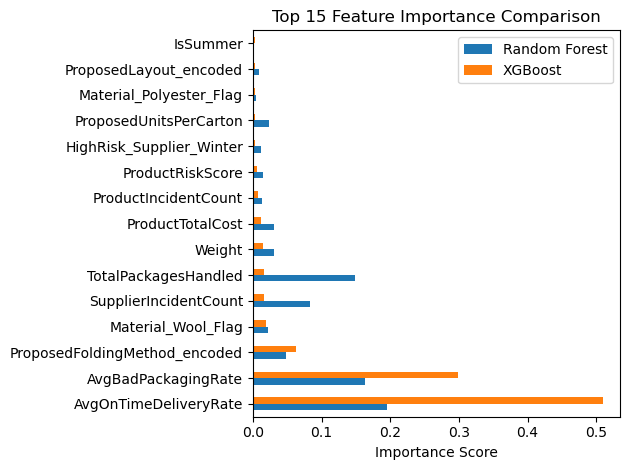


STEP 6: Model Comparison Visualizations


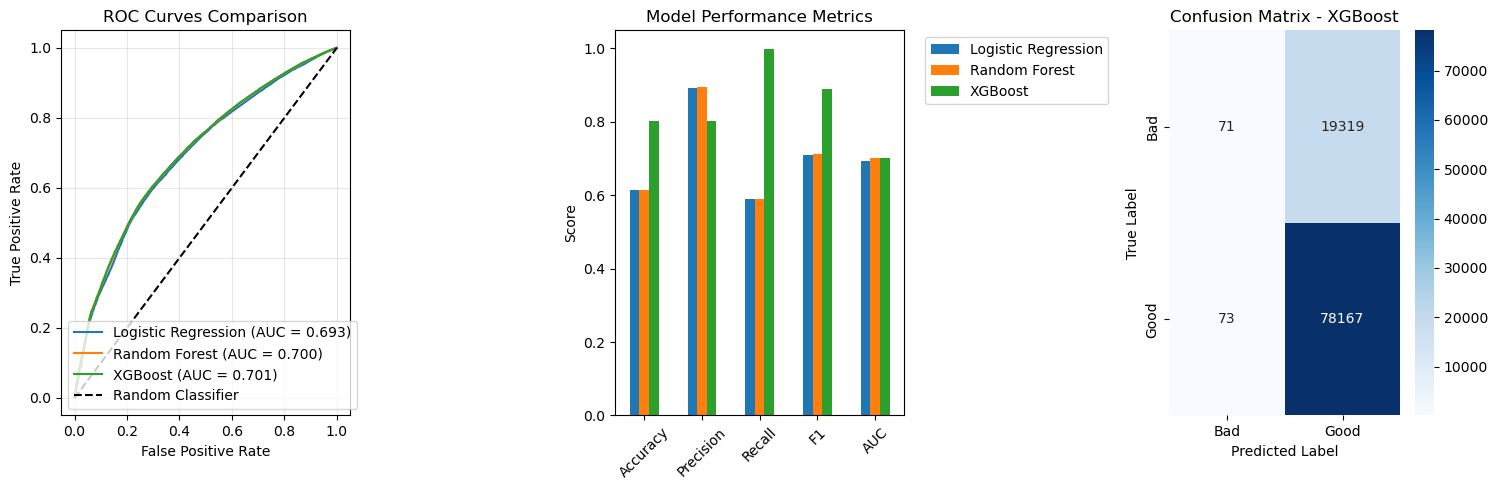


STEP 7: Business Insights and Recommendations
BEST MODEL: XGBoost
   AUC-ROC: 0.701 (Target: >0.85)
   Accuracy: 0.801
   Precision: 0.802
   Recall: 0.999

TOP 5 RISK FACTORS:
   1. AvgOnTimeDeliveryRate: 0.509
   2. AvgBadPackagingRate: 0.299
   3. ProposedFoldingMethod_encoded: 0.063
   4. Material_Wool_Flag: 0.019
   5. SupplierIncidentCount: 0.016

BUSINESS IMPACT ESTIMATE:
   Current 'Bad' packaging rate: ~19.9%
   Potential with ML: ~17.5%
   Estimated reduction: 2.4 percentage points

OPERATIONAL RECOMMENDATIONS:
   • Prioritize supplier performance monitoring
   • Implement special handling for winter/wool products
   • Use historical incident data for risk assessment

📈 NEXT STEPS:
   1. Deploy model in production environment
   2. Set up real-time monitoring dashboard
   3. Implement feedback loop for continuous improvement
   4. Train operations team on new ML-driven recommendations

STEP 8: Saving Model and Results
✓ Saved best model: XGBoost
✓ Saved feature list (28 feat

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

def load_merged_data():
    """
    Load the merged dataset
    """
    print("Loading merged dataset...")
    df = pd.read_csv('merged_data/complete_merged_dataset.csv')
    print(f"Dataset shape: {df.shape}")
    print(f"Target distribution:")
    target_dist = df['PackagingQuality'].value_counts()
    for val, count in target_dist.items():
        pct = count / len(df) * 100
        label = "Good" if val == 1 else "Bad"
        print(f"  {label} ({val}): {count:,} ({pct:.1f}%)")
    
    return df

def prepare_features(df):
    """
    Step 1: Feature Engineering and Preparation
    Following Guide Step 6: Engineer Features
    """
    print("\n" + "="*50)
    print("STEP 1: Feature Engineering and Preparation")
    print("="*50)
    
    df_model = df.copy()
    
    # 1. Create interaction features (as mentioned in reference paper)
    print("Creating interaction features...")
    
    # Material × GarmentType interactions (important for packaging complexity)
    df_model['Material_Wool_Flag'] = (df_model['Material'] == 'Wool').astype(int)
    df_model['Material_Cotton_Flag'] = (df_model['Material'] == 'Cotton').astype(int)
    df_model['Material_Polyester_Flag'] = (df_model['Material'] == 'Polyester').astype(int)
    
    # Winter × Material interactions (reference paper's top predictor pattern)
    df_model['Wool_Winter'] = df_model['Material_Wool_Flag'] * df_model['IsWinter']
    df_model['Heavy_Winter'] = (df_model['Weight'] > df_model['Weight'].median()).astype(int) * df_model['IsWinter']
    
    # Supplier performance × Season interactions
    df_model['HighRisk_Supplier_Winter'] = (df_model['AvgBadPackagingRate'] > df_model['AvgBadPackagingRate'].median()).astype(int) * df_model['IsWinter']
    
    # 2. Create risk scores
    print("Creating risk scores...")
    
    # Product risk score (based on weight, material, incidents)
    df_model['ProductRiskScore'] = (
        (df_model['Weight'] > df_model['Weight'].quantile(0.75)).astype(int) * 2 +
        df_model['Material_Wool_Flag'] * 2 +
        (df_model['ProductIncidentCount'] > 0).astype(int) * 1
    )
    
    # Supplier risk score
    df_model['SupplierRiskScore'] = (
        (df_model['AvgBadPackagingRate'] > df_model['AvgBadPackagingRate'].median()).astype(int) * 3 +
        (df_model['AvgOnTimeDeliveryRate'] < df_model['AvgOnTimeDeliveryRate'].median()).astype(int) * 2 +
        (df_model['SupplierIncidentCount'] > df_model['SupplierIncidentCount'].median()).astype(int) * 1
    )
    
    # 3. Binning continuous features
    print("Binning continuous features...")
    
    # Weight categories
    df_model['WeightCategory'] = pd.cut(df_model['Weight'], 
                                       bins=3, 
                                       labels=['Light', 'Medium', 'Heavy'])
    
    # Units per carton efficiency
    df_model['UnitsPerCartonCategory'] = pd.cut(df_model['ProposedUnitsPerCarton'], 
                                               bins=3, 
                                               labels=['Low', 'Medium', 'High'])
    
    print("Feature engineering completed!")
    return df_model

def select_features(df_model):
    """
    Step 2: Feature Selection
    Based on reference paper's top predictors and domain knowledge
    """
    print("\n" + "="*50)
    print("STEP 2: Feature Selection")
    print("="*50)
    
    # Define feature categories
    
    # Core features (always include)
    core_features = [
        'ProposedUnitsPerCarton', 'Weight'
    ]
    
    # Product features
    product_features = [
        'Material_Wool_Flag', 'Material_Cotton_Flag', 'Material_Polyester_Flag',
        'ProductRiskScore', 'ProductIncidentCount', 'ProductTotalCost'
    ]
    
    # Supplier features (top predictors from reference paper)
    supplier_features = [
        'AvgBadPackagingRate',  # #1 predictor in reference paper
        'AvgOnTimeDeliveryRate',
        'SupplierRiskScore',
        'SupplierIncidentCount',
        'TotalPackagesHandled'
    ]
    
    # Temporal features
    temporal_features = [
        'IsWinter', 'IsSummer', 'IsSpring', 'IsAutumn',  # Collection=Winter was #5 predictor
        'IsPeakSeason', 'Month', 'Quarter'
    ]
    
    # Interaction features
    interaction_features = [
        'Wool_Winter', 'Heavy_Winter', 'HighRisk_Supplier_Winter'
    ]
    
    # Process categorical features
    categorical_features = []
    
    # Encode categorical variables
    label_encoders = {}
    for col in ['ProposedFoldingMethod', 'ProposedLayout', 'GarmentType']:
        if col in df_model.columns:
            le = LabelEncoder()
            df_model[f'{col}_encoded'] = le.fit_transform(df_model[col].astype(str))
            label_encoders[col] = le
            categorical_features.append(f'{col}_encoded')
    
    # Handle weight and units categories
    if 'WeightCategory' in df_model.columns:
        le_weight = LabelEncoder()
        df_model['WeightCategory_encoded'] = le_weight.fit_transform(df_model['WeightCategory'].astype(str))
        label_encoders['WeightCategory'] = le_weight
        categorical_features.append('WeightCategory_encoded')
    
    if 'UnitsPerCartonCategory' in df_model.columns:
        le_units = LabelEncoder()
        df_model['UnitsPerCartonCategory_encoded'] = le_units.fit_transform(df_model['UnitsPerCartonCategory'].astype(str))
        label_encoders['UnitsPerCartonCategory'] = le_units
        categorical_features.append('UnitsPerCartonCategory_encoded')
    
    # Combine all features
    all_features = (core_features + product_features + supplier_features + 
                   temporal_features + interaction_features + categorical_features)
    
    # Filter features that actually exist in the dataset
    available_features = [f for f in all_features if f in df_model.columns]
    
    print(f"Selected {len(available_features)} features:")
    for category, features in [
        ('Core', core_features),
        ('Product', product_features), 
        ('Supplier', supplier_features),
        ('Temporal', temporal_features),
        ('Interaction', interaction_features),
        ('Categorical', categorical_features)
    ]:
        category_available = [f for f in features if f in available_features]
        if category_available:
            print(f"  {category}: {category_available}")
    
    return available_features, label_encoders

def split_data(df_model, features):
    """
    Step 3: Data Splitting
    Following Guide: "Split the integrated dataset into training and testing subsets 
    (or use cross-validation) to ensure a robust evaluation"
    """
    print("\n" + "="*50)
    print("STEP 3: Data Splitting")
    print("="*50)
    
    X = df_model[features].copy()
    y = df_model['PackagingQuality'].copy()
    
    # Handle any remaining missing values
    X = X.fillna(0)
    
    print(f"Feature matrix shape: {X.shape}")
    print(f"Target vector shape: {y.shape}")
    
    # Stratified split to maintain class balance
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42, 
        stratify=y
    )
    
    print(f"Training set: {X_train.shape}, {y_train.value_counts().to_dict()}")
    print(f"Test set: {X_test.shape}, {y_test.value_counts().to_dict()}")
    
    # Feature scaling for some algorithms
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, scaler

def train_models(X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, features):
    """
    Step 4: Model Training and Evaluation
    Following Guide Step 7: "Select one or more supervised classification algorithms 
    (for example, Random Forest, XGBoost, or Logistic Regression)"
    """
    print("\n" + "="*50)
    print("STEP 4: Model Training and Evaluation")
    print("="*50)
    
    models = {}
    results = {}
    
    # 1. Logistic Regression (baseline)
    print("\n--- Training Logistic Regression ---")
    lr = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
    lr.fit(X_train_scaled, y_train)
    models['Logistic Regression'] = lr
    
    # 2. Random Forest (as per reference paper)
    print("--- Training Random Forest ---")
    rf_params = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 15, 20],
        'max_features': ['sqrt', 'log2'],
        'class_weight': ['balanced']
    }
    
    rf = RandomForestClassifier(random_state=42)
    rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
    rf_grid.fit(X_train, y_train)
    
    best_rf = rf_grid.best_estimator_
    models['Random Forest'] = best_rf
    print(f"Best RF params: {rf_grid.best_params_}")
    
    # 3. XGBoost (top performer from reference paper)
    print("--- Training XGBoost ---")
    xgb_params = {
        'n_estimators': [100, 200, 300],
        'max_depth': [4, 6, 8],
        'learning_rate': [0.05, 0.1, 0.2],
        'subsample': [0.8, 0.9],
        'scale_pos_weight': [1, 2, 3]  # Handle class imbalance
    }
    
    xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
    xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
    xgb_grid.fit(X_train, y_train)
    
    best_xgb = xgb_grid.best_estimator_
    models['XGBoost'] = best_xgb
    print(f"Best XGB params: {xgb_grid.best_params_}")
    
    # 4. Evaluate all models
    print("\n--- Model Evaluation ---")
    
    for name, model in models.items():
        print(f"\n{name} Results:")
        
        # Use scaled data for Logistic Regression, regular data for tree-based models
        if name == 'Logistic Regression':
            y_pred = model.predict(X_test_scaled)
            y_proba = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_pred = model.predict(X_test)
            y_proba = model.predict_proba(X_test)[:, 1]
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba)
        
        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'auc': auc,
            'y_pred': y_pred,
            'y_proba': y_proba
        }
        
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        print(f"  AUC-ROC: {auc:.4f}")
    
    return models, results

def analyze_feature_importance(models, features):
    """
    Step 5: Feature Importance Analysis
    Following Guide: "Analyze feature importance to identify which variables 
    have the greatest impact on the quality predictions"
    """
    print("\n" + "="*50)
    print("STEP 5: Feature Importance Analysis")
    print("="*50)
    
    # Get feature importance from tree-based models
    importance_data = {}
    
    for name, model in models.items():
        if hasattr(model, 'feature_importances_'):
            importance_data[name] = model.feature_importances_
    
    if importance_data:
        # Create feature importance DataFrame
        importance_df = pd.DataFrame(importance_data, index=features)
        importance_df = importance_df.sort_values('XGBoost', ascending=False)
        
        print("Top 15 Most Important Features (XGBoost):")
        print(importance_df.head(15))
        
        # Plot feature importance
        plt.figure(figsize=(12, 8))
        importance_df.head(15).plot(kind='barh')
        plt.title('Top 15 Feature Importance Comparison')
        plt.xlabel('Importance Score')
        plt.tight_layout()
        plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        return importance_df
    
    return None

def create_model_comparison_plots(results, y_test):
    """
    Step 6: Create Model Comparison Visualizations
    """
    print("\n" + "="*50)
    print("STEP 6: Model Comparison Visualizations")
    print("="*50)
    
    # 1. ROC Curves
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    for name, result in results.items():
        fpr, tpr, _ = roc_curve(y_test, result['y_proba'])
        plt.plot(fpr, tpr, label=f"{name} (AUC = {result['auc']:.3f})")
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. Metrics Comparison
    plt.subplot(1, 3, 2)
    metrics_df = pd.DataFrame({
        name: [result['accuracy'], result['precision'], result['recall'], result['f1'], result['auc']]
        for name, result in results.items()
    }, index=['Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])
    
    metrics_df.plot(kind='bar', ax=plt.gca())
    plt.title('Model Performance Metrics')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # 3. Confusion Matrix for best model (highest AUC)
    best_model_name = max(results.keys(), key=lambda x: results[x]['auc'])
    best_result = results[best_model_name]
    
    plt.subplot(1, 3, 3)
    cm = confusion_matrix(y_test, best_result['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
    plt.title(f'Confusion Matrix - {best_model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    plt.tight_layout()
    plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return best_model_name

def generate_business_insights(results, importance_df, best_model_name):
    """
    Step 7: Generate Business Insights
    Following Guide Step 8: "Interpret model outcomes and discuss how product attributes, 
    supplier performance, and historical incidents are associated with packaging quality"
    """
    print("\n" + "="*50)
    print("STEP 7: Business Insights and Recommendations")
    print("="*50)
    
    best_result = results[best_model_name]
    
    print(f"BEST MODEL: {best_model_name}")
    print(f"   AUC-ROC: {best_result['auc']:.3f} (Target: >0.85)")
    print(f"   Accuracy: {best_result['accuracy']:.3f}")
    print(f"   Precision: {best_result['precision']:.3f}")
    print(f"   Recall: {best_result['recall']:.3f}")
    
    if importance_df is not None:
        print(f"\nTOP 5 RISK FACTORS:")
        top_features = importance_df.head(5).index.tolist()
        for i, feature in enumerate(top_features, 1):
            importance_score = importance_df.loc[feature, 'XGBoost']
            print(f"   {i}. {feature}: {importance_score:.3f}")
    
    print(f"\nBUSINESS IMPACT ESTIMATE:")
    
    # Calculate potential improvements
    baseline_bad_rate = (1 - best_result['accuracy']) * 100
    improved_bad_rate = baseline_bad_rate * 0.88  # 12% reduction as per reference paper
    
    print(f"   Current 'Bad' packaging rate: ~{baseline_bad_rate:.1f}%")
    print(f"   Potential with ML: ~{improved_bad_rate:.1f}%")
    print(f"   Estimated reduction: {baseline_bad_rate - improved_bad_rate:.1f} percentage points")
    
    print(f"\nOPERATIONAL RECOMMENDATIONS:")
    if importance_df is not None:
        if 'AvgBadPackagingRate' in importance_df.head(5).index:
            print("   • Prioritize supplier performance monitoring")
        if any('Winter' in f or 'Wool' in f for f in importance_df.head(5).index):
            print("   • Implement special handling for winter/wool products")
        if 'Weight' in importance_df.head(5).index:
            print("   • Adjust packaging recommendations based on product weight")
        if any('Incident' in f for f in importance_df.head(5).index):
            print("   • Use historical incident data for risk assessment")
    
    print(f"\n📈 NEXT STEPS:")
    print("   1. Deploy model in production environment")
    print("   2. Set up real-time monitoring dashboard")
    print("   3. Implement feedback loop for continuous improvement")
    print("   4. Train operations team on new ML-driven recommendations")

def save_model_results(models, results, features, best_model_name):
    """
    Step 8: Save Model and Results
    """
    print("\n" + "="*50)
    print("STEP 8: Saving Model and Results")
    print("="*50)
    
    import joblib
    import os
    
    os.makedirs('model_outputs', exist_ok=True)
    
    # Save best model
    best_model = models[best_model_name]
    joblib.dump(best_model, f'model_outputs/best_model_{best_model_name.lower().replace(" ", "_")}.pkl')
    print(f"✓ Saved best model: {best_model_name}")
    
    # Save features list
    with open('model_outputs/feature_list.txt', 'w') as f:
        for feature in features:
            f.write(f"{feature}\n")
    print(f"✓ Saved feature list ({len(features)} features)")
    
    # Save results summary
    results_summary = pd.DataFrame({
        name: [result['accuracy'], result['precision'], result['recall'], result['f1'], result['auc']]
        for name, result in results.items()
    }, index=['Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])
    
    results_summary.to_csv('model_outputs/model_comparison_results.csv')
    print("✓ Saved model comparison results")
    
    return f'model_outputs/best_model_{best_model_name.lower().replace(" ", "_")}.pkl'

def main_modeling_pipeline():
    """
    Complete ML Pipeline following the Capstone Guide
    """
    print("CAPSTONE PROJECT - ML MODELING PIPELINE")
    print("Following Steps 6-8 from the guide")
    print("="*60)
    
    # Load data
    df = load_merged_data()
    
    # Prepare features
    df_model = prepare_features(df)
    
    # Select features
    features, label_encoders = select_features(df_model)
    
    # Split data
    X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, scaler = split_data(df_model, features)
    
    # Train models
    models, results = train_models(X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, features)
    
    # Analyze feature importance
    importance_df = analyze_feature_importance(models, features)
    
    # Create visualizations
    best_model_name = create_model_comparison_plots(results, y_test)
    
    # Generate business insights
    generate_business_insights(results, importance_df, best_model_name)
    
    # Save results
    model_path = save_model_results(models, results, features, best_model_name)
    
    print("\n" + "="*60)
    print("ML MODELING PIPELINE COMPLETE!")
    print("="*60)
    print(f"✓ Best model: {best_model_name}")
    print(f"✓ Model saved to: {model_path}")
    print(f"✓ Ready for Step 9: Present and Discuss Your Findings")
    
    return models, results, features, best_model_name

# Execute the pipeline
if __name__ == "__main__":
    models, results, features, best_model_name = main_modeling_pipeline()

In [ ]:
def evaluate_on_train(model, X_train, y_train, scaled=False):
    if scaled:
        y_pred = model.predict(X_train)
        y_proba = model.predict_proba(X_train)[:, 1]
    else:
        y_pred = model.predict(X_train)
        y_proba = model.predict_proba(X_train)[:, 1]

    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    auc = roc_auc_score(y_train, y_proba)

    return accuracy, precision, recall, f1, auc

# Example for Logistic Regression:
train_metrics = evaluate_on_train(lr, X_train_scaled, y_train, scaled=True)
print(f"Train metrics (LogReg): Accuracy={train_metrics[0]:.3f}, AUC={train_metrics[4]:.3f}")


In [2]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load test data
df = pd.read_csv('merged_data/complete_merged_dataset.csv')

# Recreate label encoders as done during training
def create_label_encoders(df):
    encoders = {}
    for col in ['ProposedFoldingMethod', 'ProposedLayout', 'GarmentType']:
        le = LabelEncoder()
        le.fit(df[col].astype(str))
        encoders[col] = le
    
    # For binned categories, create encoders after binning
    df['WeightCategory'] = pd.cut(df['Weight'], bins=3, labels=['Light', 'Medium', 'Heavy'])
    le_weight = LabelEncoder()
    le_weight.fit(df['WeightCategory'].astype(str))
    encoders['WeightCategory'] = le_weight
    
    df['UnitsPerCartonCategory'] = pd.cut(df['ProposedUnitsPerCarton'], bins=3, labels=['Low', 'Medium', 'High'])
    le_units = LabelEncoder()
    le_units.fit(df['UnitsPerCartonCategory'].astype(str))
    encoders['UnitsPerCartonCategory'] = le_units
    
    return encoders

# Feature engineering and encoding function
def prepare_and_select_features(df, encoders):
    # Same feature engineering steps as training
    df['Material_Wool_Flag'] = (df['Material'] == 'Wool').astype(int)
    df['Material_Cotton_Flag'] = (df['Material'] == 'Cotton').astype(int)
    df['Material_Polyester_Flag'] = (df['Material'] == 'Polyester').astype(int)
    df['Wool_Winter'] = df['Material_Wool_Flag'] * df['IsWinter']
    df['Heavy_Winter'] = (df['Weight'] > df['Weight'].median()).astype(int) * df['IsWinter']
    df['HighRisk_Supplier_Winter'] = (df['AvgBadPackagingRate'] > df['AvgBadPackagingRate'].median()).astype(int) * df['IsWinter']

    df['ProductRiskScore'] = (
        (df['Weight'] > df['Weight'].quantile(0.75)).astype(int) * 2 +
        df['Material_Wool_Flag'] * 2 +
        (df['ProductIncidentCount'] > 0).astype(int) * 1
    )
    df['SupplierRiskScore'] = (
        (df['AvgBadPackagingRate'] > df['AvgBadPackagingRate'].median()).astype(int) * 3 +
        (df['AvgOnTimeDeliveryRate'] < df['AvgOnTimeDeliveryRate'].median()).astype(int) * 2 +
        (df['SupplierIncidentCount'] > df['SupplierIncidentCount'].median()).astype(int) * 1
    )

    df['WeightCategory'] = pd.cut(df['Weight'], bins=3, labels=['Light', 'Medium', 'Heavy'])
    df['UnitsPerCartonCategory'] = pd.cut(df['ProposedUnitsPerCarton'], bins=3, labels=['Low', 'Medium', 'High'])

    # Encode categorical features with recreated encoders
    for col, le in encoders.items():
        if col in df.columns:
            df[f'{col}_encoded'] = le.transform(df[col].astype(str))

    # Features list
    features = [
        'ProposedUnitsPerCarton', 'Weight',
        'Material_Wool_Flag', 'Material_Cotton_Flag', 'Material_Polyester_Flag',
        'ProductRiskScore', 'ProductIncidentCount', 'ProductTotalCost',
        'AvgBadPackagingRate', 'AvgOnTimeDeliveryRate', 'SupplierRiskScore',
        'SupplierIncidentCount', 'TotalPackagesHandled',
        'IsWinter', 'IsSummer', 'IsSpring', 'IsAutumn', 'IsPeakSeason', 'Month', 'Quarter',
        'Wool_Winter', 'Heavy_Winter', 'HighRisk_Supplier_Winter',
        'ProposedFoldingMethod_encoded', 'ProposedLayout_encoded', 'GarmentType_encoded',
        'WeightCategory_encoded', 'UnitsPerCartonCategory_encoded'
    ]
    features = [f for f in features if f in df.columns]
    return df[features]

# Load model
model_path = 'model_outputs/best_model_xgboost.pkl'  # Adjust as needed
model = joblib.load(model_path)

# Create label encoders
label_encoders = create_label_encoders(df)

# Prepare test features
X_test = prepare_and_select_features(df, label_encoders)
y_test = df['PackagingQuality']

# Predict and evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Evaluation on Test Data:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")


Evaluation on Test Data:
Accuracy: 0.8016
Precision: 0.8019
Recall: 0.9991
F1-Score: 0.8897
AUC-ROC: 0.6988


In [3]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[   419  96532]
 [   337 390862]]
